[18, 17, 16, 13, 12, 11, 10, 9, 6, 5, 4, 3, 2]


C:\Users\JAIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


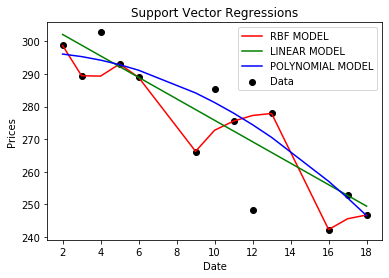

277.2581065771352
[277.25810658]
[269.20090909]
[274.41280936]


In [4]:
import csv
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import numpy as np
dates=[]
prices=[]

def get_data():
    filename="aapl.csv"
    with open(filename,'r') as csvfile:
        csvFileReader=csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('/')[1]))
            prices.append(float(row[1]))
    return
def predict_prices(dates,prices,x):
    print(dates)
    dates=np.reshape(dates,(len(dates),1))
    #dates=np.reshape(dates,(len(dates),1))
#     print(dates)
#     print(prices)
    svr_lin=SVR(kernel='linear',C=1e3)
    svr_poly=SVR(kernel='poly',C=1e3,degree=2)
    svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.1)
    svr_lin.fit(dates,prices)
    svr_poly.fit(dates,prices)
    svr_rbf.fit(dates,prices)
    plt.scatter(dates,prices,color="black",label='Data')
    plt.plot(dates,svr_rbf.predict(dates),color='red',label='RBF MODEL')
    plt.plot(dates,svr_lin.predict(dates),color='green',label='LINEAR MODEL')
    plt.plot(dates,svr_poly.predict(dates),color='blue',label='POLYNOMIAL MODEL')
    plt.xlabel('Date')
    plt.ylabel('Prices')
    plt.title('Support Vector Regressions')
    plt.legend()
    plt.show()
    x=[x]
    x=np.reshape(x,(len(x),1))
    print(svr_rbf.predict(x)[0])
    return svr_rbf.predict(x),svr_lin.predict(x),svr_poly.predict(x)

get_data()
predictedprice=predict_prices(dates,prices,12)
for p in predictedprice:
    print(p)
    